# Central limit theorem approximation for binomial distribution 

* Let $X_1,\ldots, X_n$ be independent zero-one random variable (outcomes of a biased coin) with the same probability $\Pr[X_i=1]=p$. 
* Then the sum $S=X_1+\cdots+X_n$ is distributed according to binomial distribution $\mathsf{Binom}(n,p)$.
* Due to the Centrel Limit Theorem we can approximate $\mathsf{Binom}(n,p)$ with a normal distribution $\mathcal{N}(\mu, \sigma)$.

In [1]:
import numpy as np
import numpy.random as random
from scipy.stats import binom
from scipy.stats import norm 
from plotnine import *

from pandas import Series
from pandas import DataFrame

## I.  Moment matching for binomial distribution 

Let us compute the mean and variance for the random variable $S$

\begin{align*}
\mathbf{E}(S) &= \mathbf{E}(X_1)+\cdots+\mathbf{E}(X_n) = n\cdot \mathbf{E}(X_1)\enspace,\\
\mathbf{Var}(S) &= \mathbf{Var}(X_1)+\cdots+\mathbf{Var}(X_n) = n\cdot \mathbf{Var}(X_1)\enspace.
\end{align*}

By the definition of mean and variance

\begin{align*}
\mathbf{E}(X_1)&=0\cdot \Pr[X_1=0] + 1\cdot \Pr[X_1=1] = p\enspace,\\
\mathbf{E}(X_1^2)&=0\cdot \Pr[X_1^2=0] + 1\cdot \Pr[X_1^2=1] = p\enspace,\\
\mathbf{Var}(X_1)&=\mathbf{E}[X_1^2] - \mathbf{E}(X_1)\cdot \mathbf{E}(X_1) = p-p^2=p(1-p)\enspace
\end{align*}

and thus we get

\begin{align*}
\mathbf{E}(S) &= np\enspace,\\
\mathbf{Var}(S) &= np(1-p)\enspace.
\end{align*}

From this we can conclude that $\mathsf{Binom}(n,p)$ can be approximated with a normal distribution 

\begin{align*}
\mathcal{N}(np, \sqrt{np(1-p)})\enspace.
\end{align*}




**Practice:** We can bypass this theory and let `scipy.stats` to do the computations instead of us.

In [2]:
rv = binom(100, 0.5)
mean, var, skew, kurt = binom.stats(100, 0.5, moments='mvsk')
print(f'Binomial distribution binom(100, 0.5)\n - mean: {mean} variance {var}\n')
mean, var, skew, kurt = norm.stats(100, 0.5, moments='mvsk')
print(f'Normal distribution normal(100, 0.5)\n - mean: {mean} variance {var}')

Binomial distribution binom(100, 0.5)
 - mean: 50.0 variance 25.0

Normal distribution normal(100, 0.5)
 - mean: 100.0 variance 0.25


If we do not want to use the theoretical formulae then we can find by trial and error the matching normal distribution. 

In [3]:
mean, var, skew, kurt = binom.stats(100, 0.5, moments='mvsk')
print(f'Binomial distribution binom(100, 5)\n - mean: {mean} variance {var}\n')
mu = 50
sigma = 5
mean, var, skew, kurt = norm.stats(mu, sigma, moments='mvsk')
print(f'Normal distribution normal({mu}, {sigma})\n - mean: {mean} variance {var}')

Binomial distribution binom(100, 5)
 - mean: 50.0 variance 25.0

Normal distribution normal(50, 5)
 - mean: 50.0 variance 25.0


## II. Approximation of binomial distribution
As the normal distribution is continuous and binomial is discrete, we need to split the input range into intervals $[i-0.5, i+0.5]$ around the possible outcomes $0, 1, \ldots, 100$ for a binomial distribution.  

In [4]:
rv = binom(100, 0.5)
rnorm = norm(loc=mu, scale=sigma)
df = (DataFrame(range(101), columns=['x'])
      .assign(pr=lambda df: rv.pmf(df['x']))
      .assign(apr=lambda df: rnorm.cdf(df['x'] + 0.5) - rnorm.cdf(df['x'] - 0.5)))

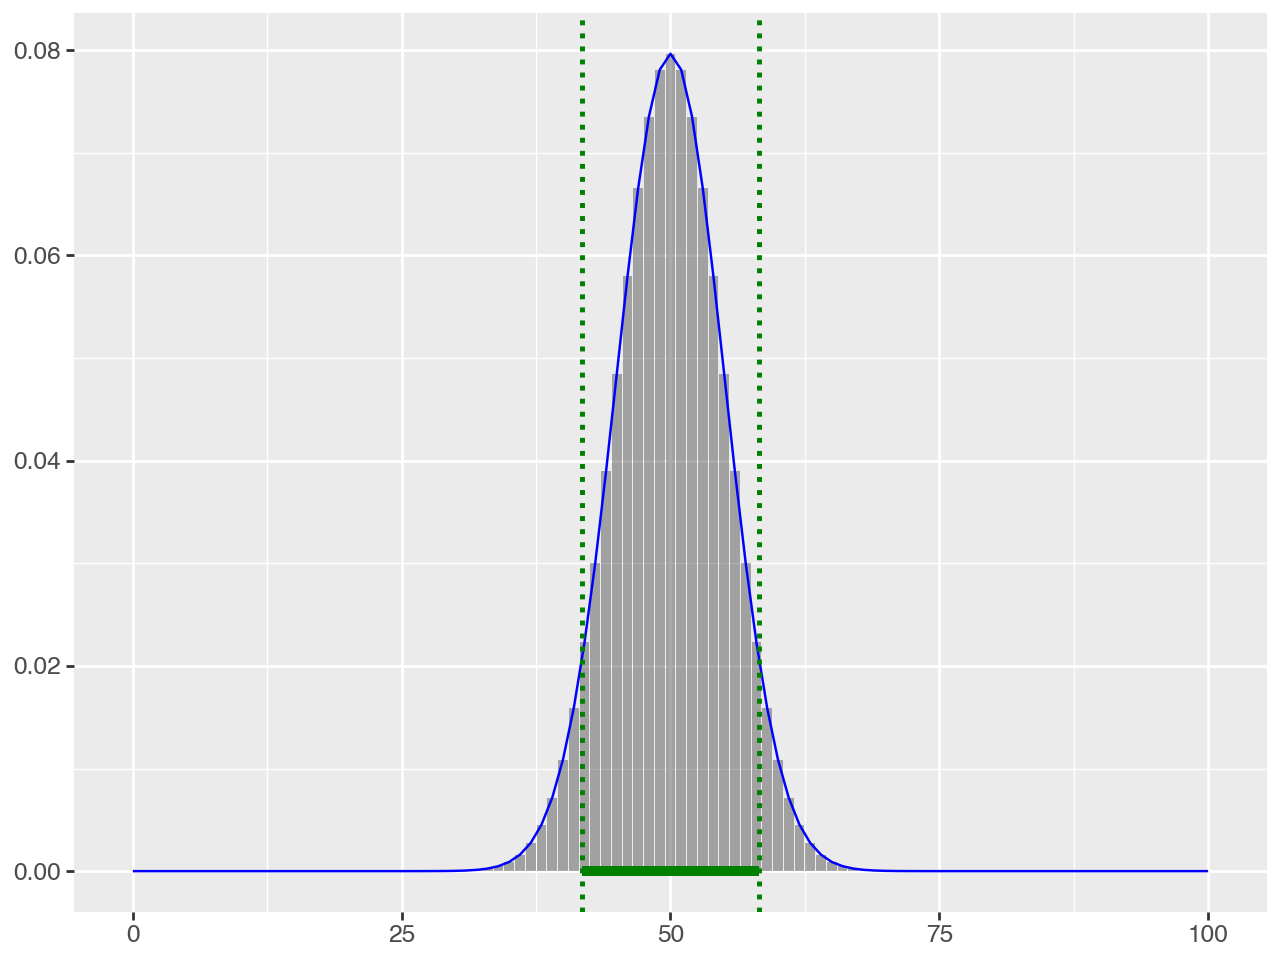

In [5]:
p = ggplot(df)
p = p + geom_col(aes(x = 'x', y = 'pr'), alpha=0.5)
p = p + geom_line(aes(x = 'x', y='apr'), color='blue')
p = p + geom_segment(x=rnorm.ppf(0.05), xend=rnorm.ppf(0.95), y=0, yend=0, color="green", size=2)
p = p + geom_vline(xintercept=rnorm.ppf(0.05), color = 'green', linetype=':', size=1)
p = p + geom_vline(xintercept=rnorm.ppf(0.95), color = 'green', linetype=':', size=1)
p = p + scale_x_continuous(name = "")
p = p + scale_y_continuous(name = "")
p

## III. Approximation of rescaled binomial distribution

Normally one works with average instead of the sum $\hat{\mu}=\frac{1}{N}\cdot(X_1+\ldots+X_n)$. By sligthtly abusing the notation we can say that $\hat{\mu}$ is distributed according to rescaled distribution $\frac{1}{n}\cdot\mathsf{Binom}(n,p)$. 
From the properties of the mean and variance we can deduce

\begin{align*}
\mathbf{E}(A) &= \mathbf{E}(\frac{1}{n}\cdot S)=\frac{1}{n}\mathbf{E}(S)=p\\
\mathbf{Vat}(A) &= \mathbf{Var}(\frac{1}{n}\cdot S)=\frac{1}{n^2}\cdot\mathbf{Var}(S)=\frac{p(1-p)}{n}
\end{align*}

and constequently the scaled distribution converges to the normal distribution $\mathcal{N}(p, p(1-p)/n)$.


We can go even further with rescaling and consider a variable 

$$Z = \frac{1}{\sqrt{np(1-p)}}\cdot (S-np)$$

that has the mean zero and variance one. The central limit theorem guarantees that $Z$ can be approximated with the standard normal distribution $\mathcal{N}$. 
In the following we show the corresponding approximation.

**Important:** Note that the discrete distribution $Z$ has observations in locations 

$$z_i=\frac{i-np}{\sqrt{np(1-p)}}$$  

and thus we need to split the input range into the intervals

$$\left[\frac{i-0.5-np}{\sqrt{np(1-p)}}, \frac{i+0.5-np}{\sqrt{np(1-p)}}\right]$$ 

for approximating the distribution. For our parameter choice $n=100$ and $p=0.5$ the term $np$ is integer and we can omit it from the interval definitions.


In [6]:
rv = binom(100, 0.5)
df = (DataFrame({'x': list(range(0,101))})
      .assign(pr = lambda df: rv.pmf(df['x']))
      .assign(z = lambda df: (df['x']-50)/(10*0.5))
      .assign(apr = lambda df: norm.cdf(df['z']+0.5/(10*0.5)) - norm.cdf(df['z']-0.5/(10*0.5))))

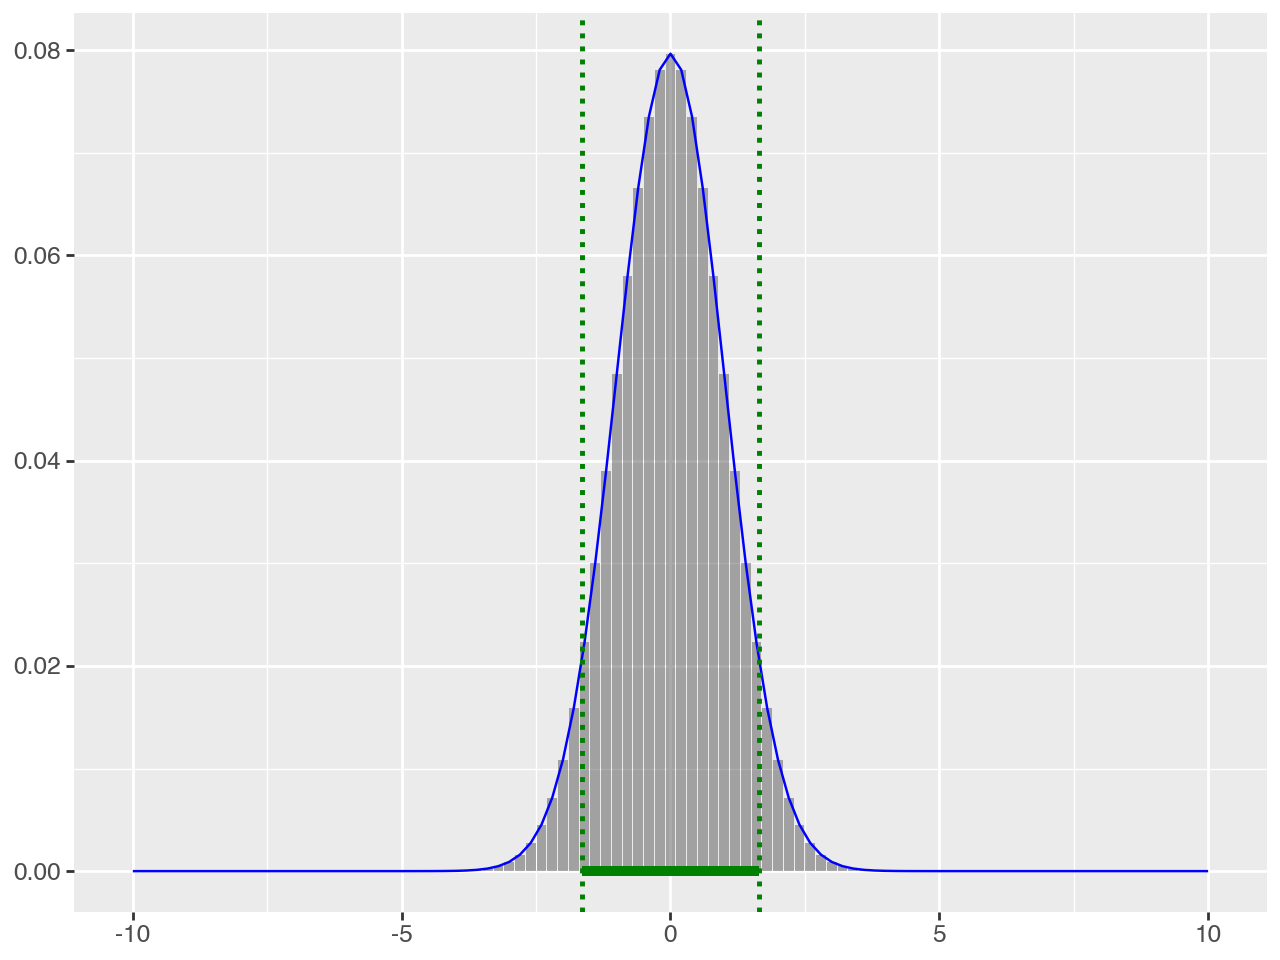

In [7]:
p = ggplot(df)
p = p + geom_col(aes(x = 'z', y = 'pr'), alpha=0.5)
p = p + geom_line(aes(x = 'z', y='apr'), color='blue')
p = p + geom_segment(x=norm.ppf(0.05), xend=norm.ppf(0.95), y=0, yend=0, color="green", size=2)
p = p + geom_vline(xintercept=norm.ppf(0.05), color = 'green', linetype=':', size=1)
p = p + geom_vline(xintercept=norm.ppf(0.95), color = 'green', linetype=':', size=1)
p = p + scale_x_continuous(name = "")
p = p + scale_y_continuous(name = "")
display(p)
#p.save('normal_approximation.pdf', path='results', height=6, width=12, verbose=False)